## Import libraries

In [54]:
import pandas as pd  # For data manipulation
import numpy as np  # For statistical operations
from matplotlib import pyplot as plt  # For basic data visualizations

import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv('data/death-rates-from-air-pollution.csv')
#df = df.dropna(axis=0)
df[df['Code'].isna()]['Entity'].unique()
df.head()

,Entity,Code,Year,"Air pollution (total) (deaths per 100,000)","Indoor air pollution (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,Afghanistan,AFG,1990,299.477309,250.362910,46.446589,5.616442
1,Afghanistan,AFG,1991,291.277967,242.575125,46.033841,5.603960
2,Afghanistan,AFG,1992,278.963056,232.043878,44.243766,5.611822
3,Afghanistan,AFG,1993,278.790815,231.648134,44.440148,5.655266
4,Afghanistan,AFG,1994,287.162923,238.837177,45.594328,5.718922


## Visualization

In [63]:
df[df['Code'].isna()]['Entity'].unique()
region = ['Andean Latin America', 'Australasia', 'Caribbean', 'Central Asia', 'Central Europe', 
          'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 
          'Central Sub-Saharan Africa', 'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa',
          'Latin America and Caribbean', 'North Africa and Middle East', 'North America', 
          'Oceania', 'Scotland', 'South Asia', 'Southeast Asia', 'Southeast Asia, East Asia, and Oceania',
          'Southern Latin America', 'Southern Sub-Saharan Africa','Sub-Saharan Africa', 
          'Tropical Latin America', 'Western Europe', 'Western Sub-Saharan Africa']
constituent_country = ['England', 'Northern Ireland', 'Wales']
income = ['High-income', 'High-income Asia Pacific']
sdis = ['High SDI', 'High-middle SDI', 'Middle SDI', 'Low-middle SDI', 'Low SDI']

In [64]:
regions = df[df['Entity'].isin(region)].copy(deep=True)
# Dropping the 'Code' column
regions.drop('Code', axis=1, inplace=True)

# Creating a new dataframe for the constituent countries
constituent_countries = df[df['Entity'].isin(constituent_country)].copy(deep=True)
# Dropping the 'Code' column
constituent_countries.drop('Code', axis=1, inplace=True)

# Creating a new dataframe for the different high-income countries
high_income = df[df['Entity'].isin(income)].copy(deep=True)
# Dropping the 'Code' column
high_income.drop('Code', axis=1, inplace=True)

# Creating a new dataframe from the different SDI levels
sdi = df[df['Entity'].isin(sdis)].copy(deep=True)
# Dropping the 'Code' column
sdi.drop('Code', axis=1, inplace=True)

In [65]:
countries = df.copy(deep=True)
# Dropping the rows with missing values
countries.dropna(inplace=True)

In [66]:
print('Total Number of Missing Values:', \
      sum(countries.isna().sum().values) + \
      sum(regions.isna().sum().values) + \
      sum(constituent_countries.isna().sum().values) + \
      sum(high_income.isna().sum().values) + \
      sum(sdi.isna().sum().values)
     )

Total Number of Missing Values: 0


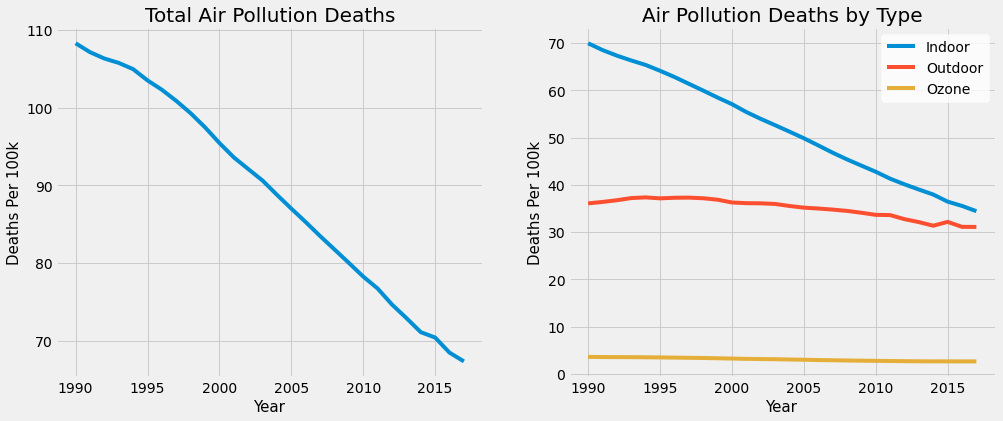

In [67]:
plt.figure(figsize=(15,6))  # Increasing the plot size

plt.subplot(1,2,1)  # Specifiying which subplot this will be
plt.plot(countries.groupby('Year').mean().iloc[:,0])  # Creating the plot
plt.xlabel('Year', size=15)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=15)  # Labeling the y-axis
plt.title('Total Air Pollution Deaths', size=20, fontfamily='sans-serif')  # Adding a title
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines

plt.subplot(1,2,2)  # Specifying which subplot this will be
plt.plot(countries.groupby('Year').mean().iloc[:,1], label='Indoor')  # Adding a line for indoor deaths
plt.plot(countries.groupby('Year').mean().iloc[:,2], label='Outdoor')  # Adding a line for outdoor deaths
plt.plot(countries.groupby('Year').mean().iloc[:,3], label='Ozone')  # Adding a line for ozone deaths
plt.xlabel('Year', size=15)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=15)  # Labeling the y-axis
plt.title('Air Pollution Deaths by Type', size=20, fontfamily='sans-serif')  # Adding a title
legend = plt.legend(frameon=1, loc='best')  # Adding the legend and assigning it to a variable
frame = legend.get_frame()  # Assigning the legend's frame to a variable
frame.set_color('white')  # Setting the background color of the legend
plt.style.use('fivethirtyeight')  # Using a plot style to include gridlines


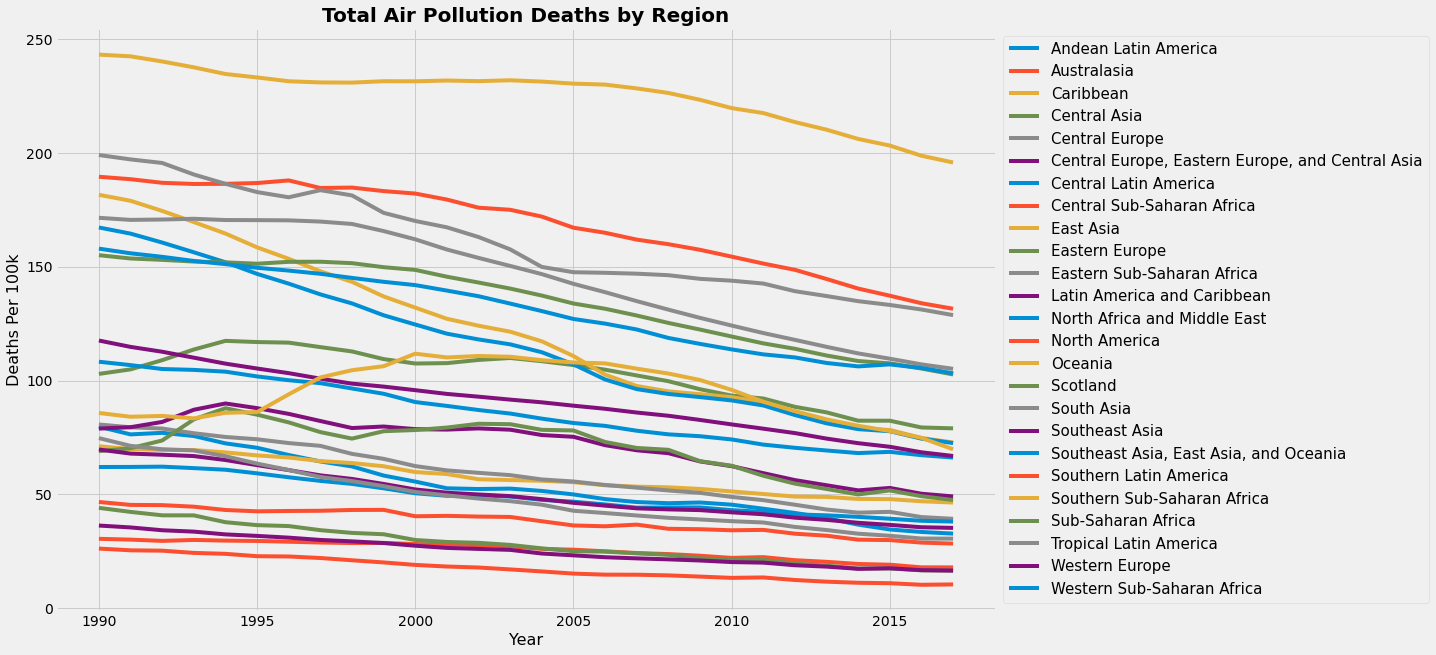

In [68]:
plt.figure(figsize=(15,10))  # Increasing the plot size

# Using a loop to add lines for each region
for r in region:
    plt.plot(regions[regions['Entity'] == r].groupby('Year').mean().iloc[:,0], label = r)

plt.xlabel('Year', size=16)  # Labeling the x-axis
plt.ylabel('Deaths Per 100k', size=16)  # Labeling the y-axis
plt.title('Total Air Pollution Deaths by Region', size=20,fontfamily='sans-serif', fontweight='bold')  # Adding a title
plt.legend(bbox_to_anchor=(1,1), loc="upper left", prop={'size': 15})
plt.style.use('fivethirtyeight')  # Using a plot style to include gridl

## Preprocessing

In [69]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df = df.drop(["Indoor air pollution (deaths per 100,000)","Entity"],axis=1)
df["Code"] = l.fit_transform(df["Code"])
df.head()

,Code,Year,"Air pollution (total) (deaths per 100,000)","Outdoor particulate matter (deaths per 100,000)","Outdoor ozone pollution (deaths per 100,000)"
0,0,1990,299.477309,46.446589,5.616442
1,0,1991,291.277967,46.033841,5.603960
2,0,1992,278.963056,44.243766,5.611822
3,0,1993,278.790815,44.440148,5.655266
4,0,1994,287.162923,45.594328,5.718922


## Fitting model

<AxesSubplot: >

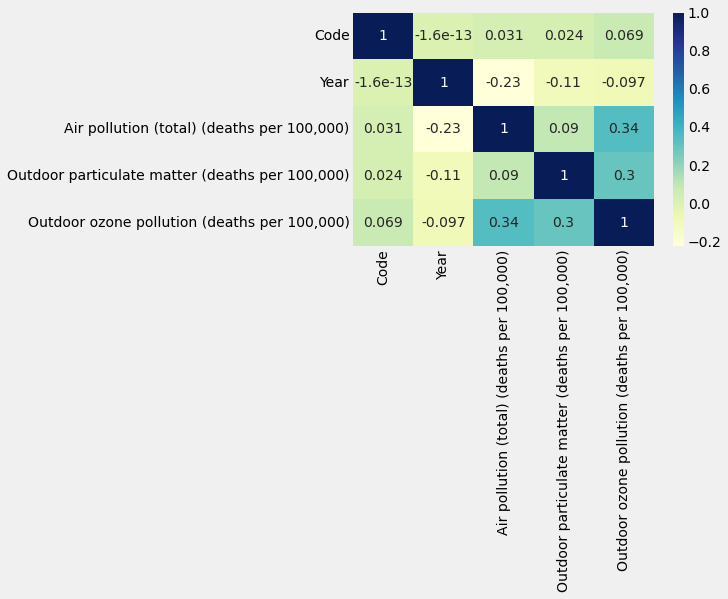

In [70]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

In [71]:
from sklearn.model_selection import train_test_split
X = df[["Code","Year","Outdoor ozone pollution (deaths per 100,000)"]]
y = df["Outdoor particulate matter (deaths per 100,000)"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

## Train the model

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
predicted = model.predict(X_test)

In [74]:
print("Predicted values are : ",predicted[:5])
print("Predicted coefficients are : ",model.coef_)
print("The slope of the line is : ",model.intercept_)

Predicted values are :  [34.61192638 36.60456683 31.89299751 34.48116997 31.20302201]
Predicted coefficients are :  [-0.00218986 -0.17991907  1.17830058]
The slope of the line is :  391.8624183939416


## Metrics

In [75]:
from sklearn.metrics import mean_squared_error
total_error = mean_squared_error(y_test,predicted)

In [76]:
print("Total mean squared error is : ", total_error)

Total mean squared error is :  305.588862168591
